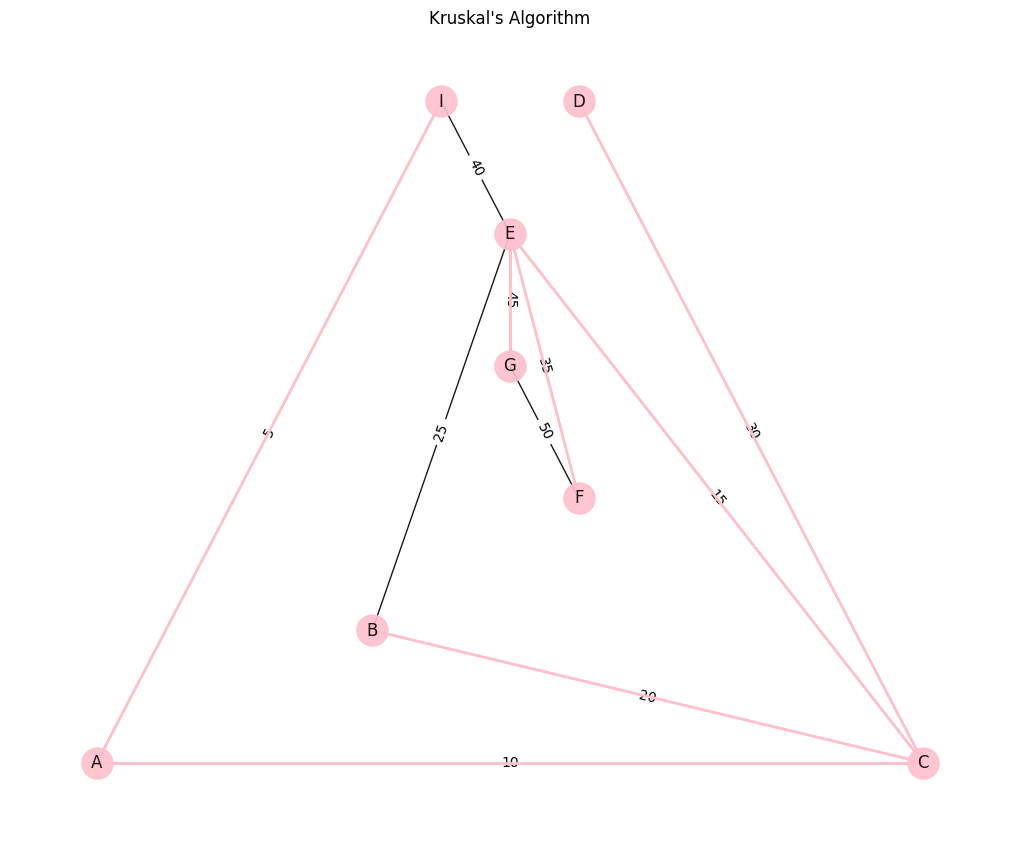

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
# create a kruskal algorithm function
def kruskal(graph):
    mst = nx.Graph()
    mst.add_nodes_from(graph.nodes)
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    for edge in edges:
        u, v, w = edge
        mst.add_edge(u, v, weight=w['weight'])
        if len(nx.cycle_basis(mst)) > 0:
            mst.remove_edge(u, v)
    return mst

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),("C", "D", 30), 
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)
kruskal_graph = kruskal(G) # Implement Kruskal's algorithm by calling the function

# Draw the graph and minimum spanning tree
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_edges(kruskal_graph, pos=pos, edge_color='pink', width=2)
plt.title("Kruskal's Algorithm")
plt.show()